In [1]:
import random
from itertools import permutations
import matplotlib.pyplot as plt
import time
%matplotlib inline


In [16]:
City = complex
def X(city): return city.real
def Y(city): return city.imag

def distance(a,b): return abs(b-a)

def Cities(n, w=900, h=600, seed=1):
    # creo n punti a caso sul piano.
    random.seed(seed)
    return frozenset(City(random.randrange(w),random.randrange(h)) for _ in range(n))

Tour = list

def first(s):
    return next(iter(s))

def alltours(cities):
    start = first(cities)
    return [[start] + Tour(r) for r in permutations(cities - {start})]

def tour_length(t):
    return sum(distance(t[i-1],t[i]) for i in range(len(t)))

def minimo_tours(x) -> list:
    return min(x,key=tour_length)

def bruteforce(c): 
    return minimo_tours(alltours(c))
 

In [17]:
c = Cities(5,seed=10)
print(c)

frozenset({(439+494j), (832+503j), (585+33j), (591+15j), (211+473j)})


In [4]:
l = alltours(c)
sol = min(l,key=tour_length)
print(sol)
print(bruteforce(c))

[(134+524j), (232+252j), (281+19j), (599+340j), (660+458j)]
[(134+524j), (232+252j), (281+19j), (599+340j), (660+458j)]


In [11]:

def plot_tour(tour):
    "Plot the cities as circles and the tour as lines between them. Start city is red square."
    start = tour[0]
    plot_lines(list(tour) + [start])
    plot_lines([start], 'rs') # Mark the start city with a red square
    
def plot_lines(points, style='bo-'):
    "Plot lines to connect a series of points."
    plt.plot(list(map(X, points)), list(map(Y, points)), style)
    plt.axis('scaled'); plt.axis('off')    
    
def plot_tsp(algorithm, cities):
    "Apply a TSP algorithm to cities, plot the resulting tour, and print information."
    # Find the solution and time how long it takes
    t0 = time.perf_counter()
    tour = algorithm(cities)
    t1 = time.perf_counter()
    assert valid_tour(tour, cities)
    plot_tour(tour); 
    plt.show()
    print(f"{len(tour)} city tour with length {tour_length(tour):.1f} in {t1 - t0:.3f} secs for {algorithm.__name__}")
    
def valid_tour(tour, cities):
    "Is tour a valid tour for these cities?"
    return set(tour) == set(cities) and len(tour) == len(cities)
    
    

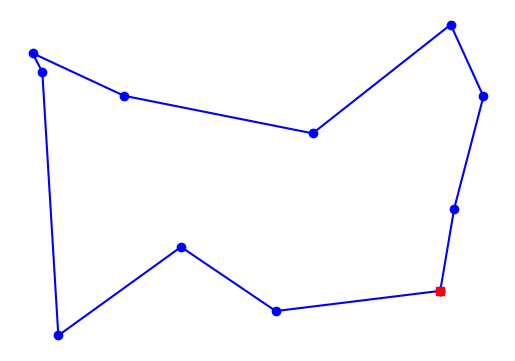

11 city tour with length 2100.3 in 5.879 secs for bruteforce


In [48]:
plot_tsp(bruteforce,Cities(11))

In [6]:
# Mangione = Gready Algorithms
# soluzione ottima globale tour*

# in ogni istante abbiamo una soluzione parziale tour_partial
# una misura di costo per ogni passo.
# cerco ad ogni passo il minimo locale.
# scelta gready -> prendo il punto a distanza minima.

def nn_tsp(cities):
    """ Gready approach with linear time complexity
    """
    start = first(cities)
    tour = [start]
    unvisited = set(cities - {start})
    while unvisited:                              # len(unvisited) decrease for each iteration.
        c = nearest_neighbor(tour[-1],unvisited)  # vicino dell'ultima città visitata
        tour.append(c)
        unvisited.remove(c)
    return tour
    
def nearest_neighbor(x, cities):
    return min(cities, key=lambda b: distance(x,b))



In [24]:
c = Cities(11,seed=1)

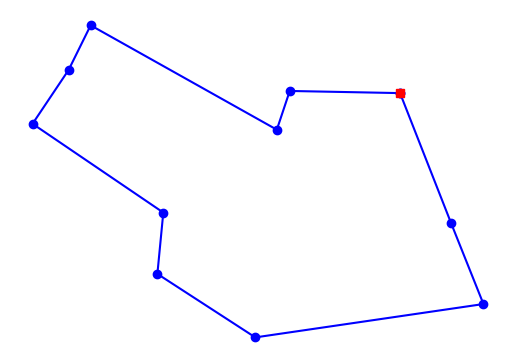

11 city tour with length 2365.8 in 7.297 secs for bruteforce


In [25]:
plot_tsp(bruteforce,c)

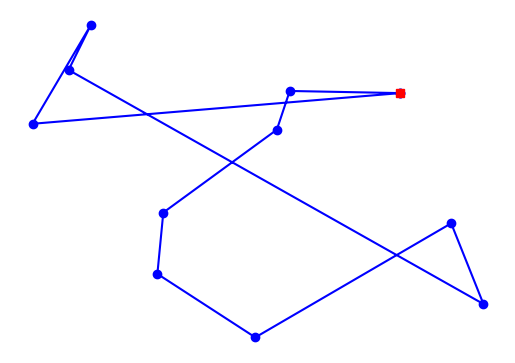

11 city tour with length 3332.1 in 0.000 secs for nn_tsp


In [26]:
plot_tsp(nn_tsp,c)

In [27]:
3332.1/2365.8

1.4084453461831092

In [29]:
# modificare nn_tsp: trovare per ogni punto, i 'due' vicini più prossimi.
# scegliere il vicino più prossimo con probabilità p, e quello successivo con probabilità (1-p)
# G = (V,E)
# start,target
# qual'è il percorso di costo minimo sul grafo
def shortest_path(V,E):
    start = V[0]
    
start = 34    
V = np.arange(100)
D = np.zero(len(V))+10000 # qual'è la distanza tra start e tutti gli altri nodi del grafo.
D[start] = 0
mask = np.zero(len(V),dtype=bool)
s = start
# FIFO = First IN -> First OUT -> Coda=Queue
# LIFO = Last IN -> Fist OUT --> Pila=Stack
visited = [start]
while len(visited)>0:  
    s = visited.pop()  # dopo A, visited = {B,E,D}
    for v,d in s.neighbours():
        D[v] = min(D[v],D[s]+d)   # s = B, v = C, D[C] = 
        if v not in visited:
            visited.append(v)


NameError: name 'V' is not defined

Il problema del percorso di costo minimo (Minimum Shortest Path) tra due nodi in un grafo, è
definito come:
    
  $  \min_{P_{u,v}}  \sum_{i=0}^{|P|} d(v_i,v_{i+1}) $

In [ ]:
import 

mask = np.zero(len(10),dtype=bool)


In [31]:
mask = np.zero(len(10),dtype=bool)

NameError: name 'np' is not defined